In [2]:
!pip install pykalman

    100% |████████████████████████████████| 235kB 761kB/s ta 0:00:01
  Running setup.py bdist_wheel for pykalman ... done
  Stored in directory: /Users/MichelMacSDD/Library/Caches/pip/wheels/d6/2b/57/aa2d27dc6e9ccc0830a0b9fd62fe2e740ba15feebdb2e5e69e
Successfully built pykalman


In [8]:
%matplotlib inline 
# Import a Kalman filter and other useful libraries
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import poly1d

In [5]:
tau = 0.1

# Set up the filter
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # position is 1-dimensional, (x,v) is 2-dimensional
                  initial_state_mean=[30,10],
                  initial_state_covariance=np.eye(2),
                  transition_matrices=[[1,tau], [0,1]],
                  observation_matrices=[[1,0]],
                  observation_covariance=3,
                  transition_covariance=np.zeros((2,2)),
                  transition_offsets=[-4.9*tau**2, -9.8*tau])

In [10]:
# Create a simulation of a ball falling for 40 units of time (each of length tau)
times = np.arange(40)
actual = -4.9*tau**2*times**2

# Simulate the noisy camera data
sim = actual + 3*np.random.randn(40)

# Run filter on camera data
state_means, state_covs = kf.filter(sim)

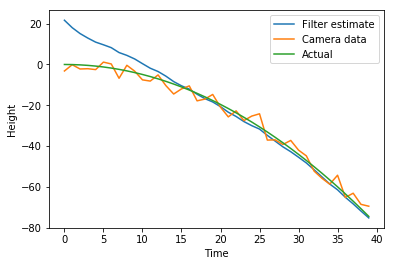

In [9]:
plt.plot(times, state_means[:,0])
plt.plot(times, sim)
plt.plot(times, actual)
plt.legend(['Filter estimate', 'Camera data', 'Actual'])
plt.xlabel('Time')
plt.ylabel('Height');

In [ ]:
tau = 0.1

# Set up the filter
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # position is 1-dimensional, (x,v) is 2-dimensional
                  initial_state_mean=[30,10],
                  initial_state_covariance=np.eye(2),
                  transition_matrices=[[1,tau], [0,1]],
                  observation_matrices=[[1,0]],
                  observation_covariance=3,
                  transition_covariance=np.zeros((2,2)),
                  transition_offsets=[-4.9*tau**2, -9.8*tau])

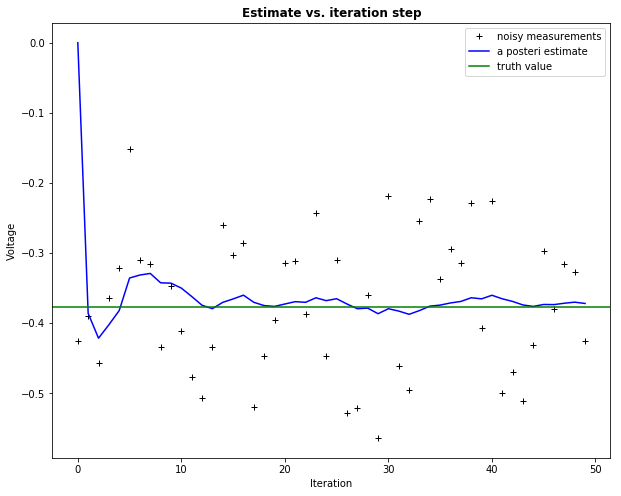

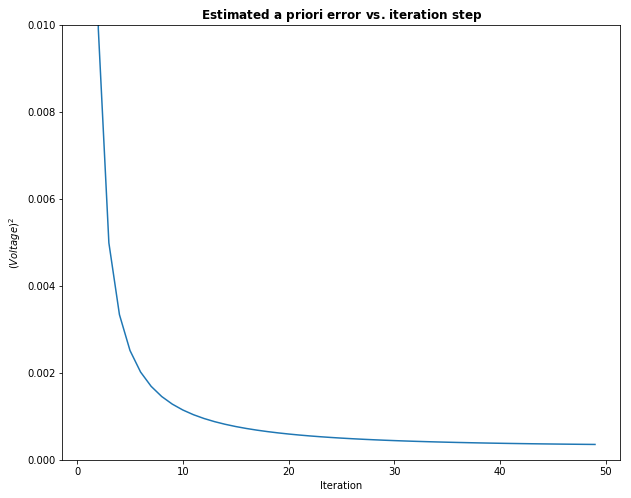

In [11]:
# Kalman filter example demo in Python

# A Python implementation of the example given in pages 11-15 of "An
# Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
# University of North Carolina at Chapel Hill, Department of Computer
# Science, TR 95-041,
# http://www.cs.unc.edu/~welch/kalman/kalmanIntro.html

# by Andrew D. Straw

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()

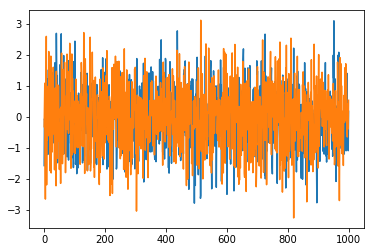

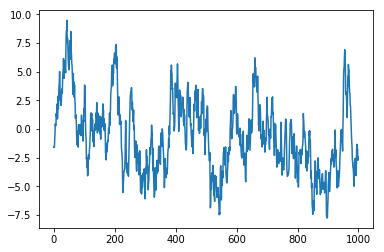

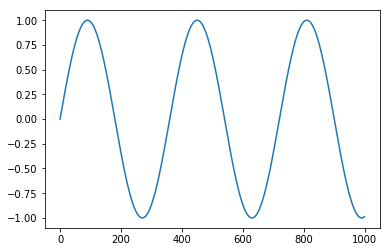

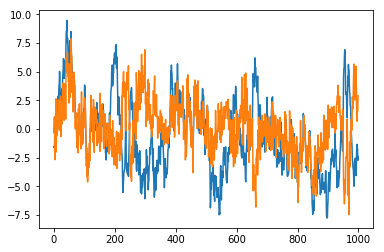

In [3]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from pykalman import KalmanFilter

Data = pd.DataFrame(columns=['NoiseAR','NoiseReg', 'x', 'beta', 'y'], index=range(1000))

Data['NoiseAR'] = np.random.normal(loc=0.0, scale=1.0, size=1000)
Data['NoiseReg'] = np.random.normal(loc=0.0, scale=1.0, size=1000)
plt.plot(Data[['NoiseAR','NoiseReg']])
plt.show()

for i in range(1000):
    if i == 0:
        Data.loc[i, 'x'] = Data.loc[i, 'NoiseAR']
    else:
        Data.loc[i, 'x'] = 0.95 * Data.loc[i - 1, 'x'] + Data.loc[i, 'NoiseAR']

plt.plot(Data['x'])
plt.show()

for i in range(1000):
    Data.loc[i, 'beta'] = np.sin(np.radians(i))

plt.plot(Data['beta'])
plt.show()

Data['y'] = Data['x']*Data['beta'] + Data['NoiseReg']

plt.plot(Data[['x', 'y']])
plt.show()

F = [1.]
H = Data['x'].values.reshape(1000,1,1).astype(float)
Q = [2.]
R = [2.]